In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam.csv


In [7]:
# read the data set which is stored in a CSV file called spam.csv

df = pd.read_csv("/content/spam.csv", encoding="latin-1") # latin-1 is often used for legacy datasets that include special characters
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1) # axis=1 means "drop column". This step performs some data pre-processing by dropping unnecessary columns using the drop method
df = df.rename(columns={'v1': 'label', 'v2': 'text'}) # Renames two columns to have more meaningful names and
df['label_enc'] = df['label'].map({'ham': 0, 'spam': 1}) # Additionally encode the labels as numerical values mapping 'ham' to zero and 'spam' to one
df.head() # Displays the first 5 rows

,label,text,label_enc
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


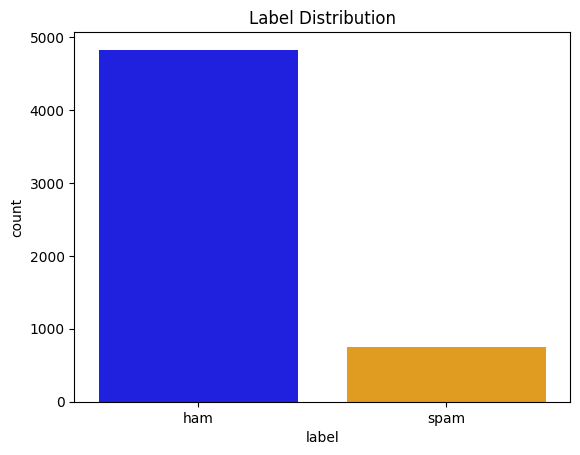

In [10]:
# Explore the data before building an ML model. This helps us understand the data set and gain insights. Let's visualize the distribution of the labels in our data set

# Define color mapping for each label

color = df['label'].map({'ham': 'blue', 'spam': 'orange'})

# In this code snippet we use the count plot function from the Seaborn library to create a bar plot of the label distribution
# User or to fix bar positions and apply color list

sns.countplot(x='label', hue='label', data=df, palette={'ham': 'blue', 'spam': 'orange'}, legend=False)

plt.title('Label Distribution')
plt.show()

In [14]:
# To train our machine learning models, we need to convert the text messages into numerical representations

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X, y = np.asarray(df['text']), np. asarray(df['label_enc'])

tfidf_vec = TfidfVectorizer().fit(X)
X_vec = tfidf_vec.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42) # Use 20% for testing

"""
In this code snippet we import the Tfidf Vectorizer class from the 'sklearn.feature_extraction.txt' to convert the text messages into TFIDF (Term Frequency Inverse Document Frequency) vectors which is a commonly used technique
for text feature extraction which splits the data set into training and testing sets using the trading test split from sklearn model selection. This ensures that our model is evaluated on unseen data
"""

In [16]:
#  To build our ML model, we'll be using the Multinomial Naive Bias classifier which is a popular choice for text classification tasks

# In this code snippet we import the Multinomial NB class from 'sklearn.naive_bayes'.
from sklearn.naive_bayes import MultinomialNB

# Train the Multinomial Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# We then create an instance of Multinomial Naive Base model and train it using training data

MultinomialNB()

In [17]:
# Now we can go ahead and evaluate the performance of our model on testing data

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.2f})".format(accuracy))
print("Precision: {:.2f})".format(precision))
print("Recall: {:.2f})".format(recall))
print("F1 Score: {:.2f})".format(f1))

"""
In this code snippet we import several metric functions from 'Sklearn.metrics' including the accuracy_score, precision_score, recall_score and f1_score. We use these functions to calculate the accuracy precision recall
and F1 score of our model's predictions on the testing data.
"""


Accuracy: 0.96)
Precision: 1.00)
Recall: 0.72)
F1 Score: 0.84)


**✅ Why This Is a Solid Result**

*   **High Accuracy** (0.96)
    The model correctly classifies 96% of all messages. This shows strong overall performance, though it's important to consider class imbalance (spam vs. ham).

*   **Perfect Precision** (1.00)
    Every message flagged as spam is truly spam. This means:
      - No false positives: the model never wrongly flags a legitimate (ham) message.
      - Great for avoiding disruption to users who shouldn't have their messages blocked.

*   **Moderate Recall** (0.72)
    The model successfully detects 72% of actual spam messages, but it misses about 28%. While it's cautious and avoids false alarms, it lets some spam slip through.

*   **Strong F1 Score** (0.84)
    This harmonic mean of precision and recall shows a good balance. The model is effective overall, especially considering the high precision.



📌 **Conclusion**

This model is well-suited for real-world use where avoiding false positives is critical — such as in email or SMS systems — but there's room to improve recall if catching more spam becomes a higher priority.